In [1]:
import matplotlib.pyplot as plt
import numpy as np

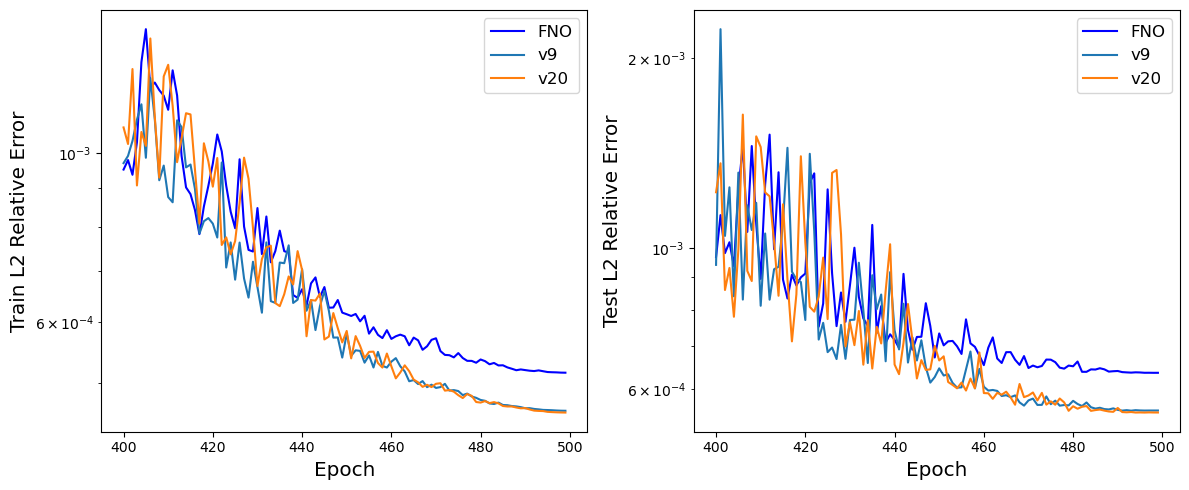

In [14]:
EPOCHS = 500

my_slice = slice(EPOCHS - 100, EPOCHS)

losses = np.load("burgers_train_history.npz")
og_train_losses, og_test_losses = losses["arr_1"][my_slice], losses["arr_2"][my_slice]

r = [9, 20]
# legend = ["FNO", "GN (1)", "GN (4)", "GN (8)", "GN (16)"]

train_looses = []
test_losses = []

for i in r:
    losses = np.load(f"proposal/burgers/v{i}/burgers_train_history.npz")
    train_looses.append(losses["arr_1"][my_slice])
    test_losses.append(losses["arr_2"][my_slice])

domain = np.arange(my_slice.start, my_slice.stop)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(domain, og_train_losses, color="blue", label="FNO")
for i, tl in enumerate(train_looses):
    plt.plot(domain, tl, label=f"v{r[i]}")
plt.yscale("log")
plt.xlabel("Epoch", fontsize="x-large")
plt.ylabel("Train L2 Relative Error", fontsize="x-large")
# plt.legend(legend, fontsize="large")
plt.legend(fontsize="large")

plt.subplot(1, 2, 2)
plt.plot(domain, og_test_losses, color="blue", label="FNO")
for i, tl in enumerate(test_losses):
    plt.plot(domain, tl, label=f"v{r[i]}")
plt.yscale("log")
plt.xlabel("Epoch", fontsize="x-large")
plt.ylabel("Test L2 Relative Error", fontsize="x-large")
# plt.legend(legend, fontsize="large")
plt.legend(fontsize="large")

plt.tight_layout()
plt.show()